This notebook uses the daily global COVID-19 dataset from the European Centre for Disease Prevention and Control (EUCDC), which contains information such as new cases and deaths per country per day.

I want to further explore the situation in the UK as the UK government has announced stricter lockdown measures across the country due to increases in cases.

#### Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Use data from Excel file rather than csv as there are less formatting issues.

In [17]:
df = pd.read_excel(r'C:\Users\vinhe\Code\Projects\covid-19_analysis\COVID-19-geographic-disbtribution-worldwide-2020-09-27.xlsx', keep_default_na=False, na_values='')

In [18]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-27,27,9,2020,35,0,Afghanistan,AF,AFG,38041757.0,Asia,1.540413
1,2020-09-26,26,9,2020,6,2,Afghanistan,AF,AFG,38041757.0,Asia,1.540413
2,2020-09-25,25,9,2020,16,0,Afghanistan,AF,AFG,38041757.0,Asia,1.614016
3,2020-09-24,24,9,2020,25,5,Afghanistan,AF,AFG,38041757.0,Asia,1.645560
4,2020-09-23,23,9,2020,71,2,Afghanistan,AF,AFG,38041757.0,Asia,1.642931


In [20]:
# Use the count function to see how many missing values there are
df.count()

dateRep                                                       45390
day                                                           45390
month                                                         45390
year                                                          45390
cases                                                         45390
deaths                                                        45390
countriesAndTerritories                                       45390
geoId                                                         45390
countryterritoryCode                                          45326
popData2019                                                   45326
continentExp                                                  45390
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    42609
dtype: int64

In [22]:
# Analysis of countries will be by geoId.
# Check that there are no rows with missing geoId
df[df['geoId'].isna()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000


In [23]:
df_geo = df.dropna(subset=['geoId']).pivot(index='dateRep', columns='geoId', values=['cases','deaths'])
df_geo.head()

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
dateRep                                                   ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  

[5 rows x 420 columns]

There are many missing values which means that there is no data for that country on that date. We can use the describe function to provide some quick summaries of the dataset. Transpose the table to make it easier to read.

In [27]:
df_geo.describe().transpose()

count        mean         std   min   25%    50%     75%     max
       geoId                                                                  
cases  AD     198.0    9.272727   18.171109   0.0  0.00    1.0   11.00   117.0
       AE     266.0  340.669173  292.949663   0.0  2.00  350.5  544.75  1083.0
       AF     262.0  149.721374  226.032333   0.0  0.00   38.0  205.00  1063.0
       AG     192.0    0.526042    2.958588   0.0  0.00    0.0    0.00    39.0
       AI     185.0    0.016216    0.164041   0.0  0.00    0.0    0.00     2.0
...             ...         ...         ...   ...   ...    ...     ...     ...
deaths XK     198.0    3.126263    5.007529 -12.0  0.00    1.0    5.00    40.0
       YE     171.0    3.438596    6.300376   0.0  0.00    2.0    4.00    52.0
       ZA     204.0   80.274510   92.485457   0.0  5.75   52.0  115.75   572.0
       ZM     193.0    1.720207    4.903704   0.0  0.00    0.0    1.00    40.0
       ZW     191.0    1.188482    2.864680   0.0  0.00    0.0    1.00    18.0

[420 rows x 8 columns]

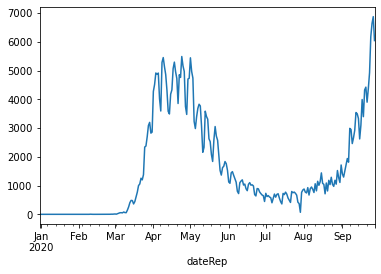

In [28]:
df_geo['cases']['UK'].plot()

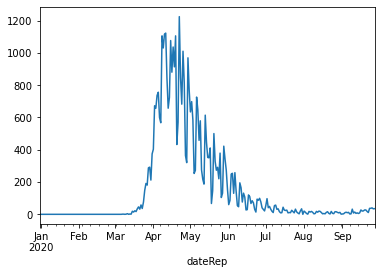

In [29]:
df_geo['deaths']['UK'].plot()

To get both figures on the same plot, let's create different slices of the pivot table.

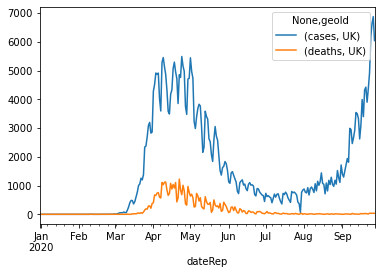

In [30]:
df_geo[[('cases','UK'), ('deaths','UK')]].plot()

#### Let's see what other countries look like

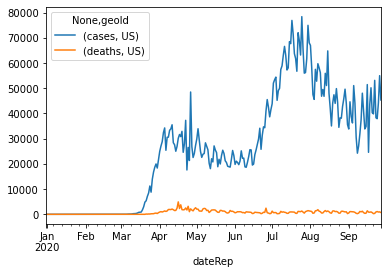

In [33]:
# USA
df_geo[[('cases','US'), ('deaths','US')]].plot()

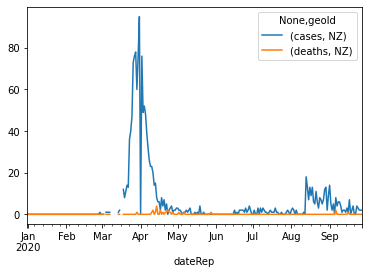

In [34]:
# New Zealand
df_geo[[('cases','NZ'), ('deaths','NZ')]].plot()

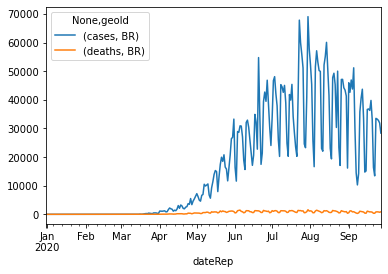

In [35]:
# Brazil
df_geo[[('cases','BR'), ('deaths','BR')]].plot()

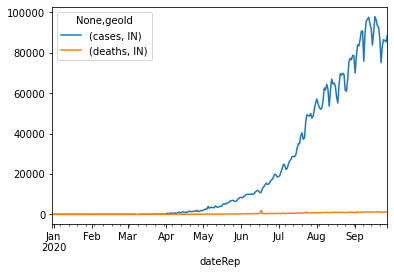

In [36]:
# India
df_geo[[('cases','IN'), ('deaths','IN')]].plot()

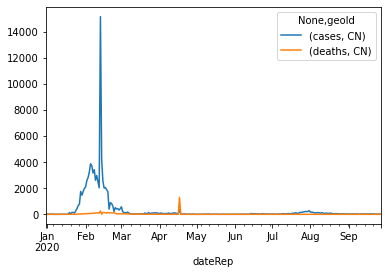

In [32]:
# China
df_geo[[('cases','CN'), ('deaths','CN')]].plot()

The big spike in cases in China in late February is due to a change in the counting methodology, where an extra 15,000 cases were added. We can find the exact date this occurred by selecting cases where cases in CN were above 4000.

In [37]:
df_geo[df_geo['cases']['CN'] > 4000]['cases']['CN']

dateRep
2020-02-13    15141.0
2020-02-14     4156.0
Name: CN, dtype: float64

#### Cumualtive Sum Plots
Cumulative sum can be used to show the growth in number of cases. Let's compare total cases over time in UK, France, Spain, Germany, and Greece.

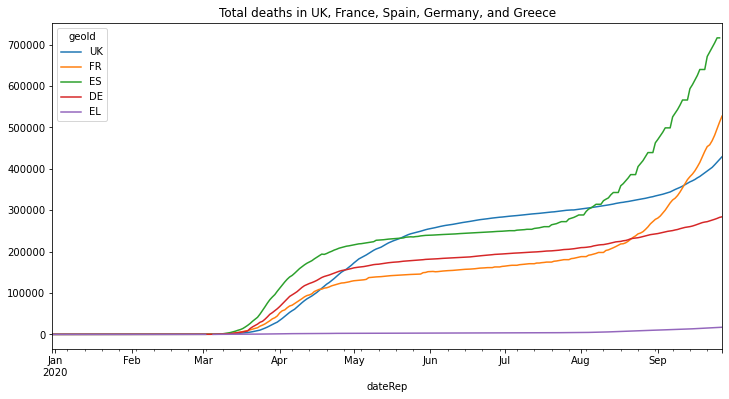

In [107]:
df_geo['cases'][['UK', 'FR', 'ES', 'DE', 'EL']].cumsum().plot(
    figsize=(12,6),
    title='Total deaths in UK, France, Spain, Germany, and Greece')

Let's compare deaths in US, Brazil, India, and China.

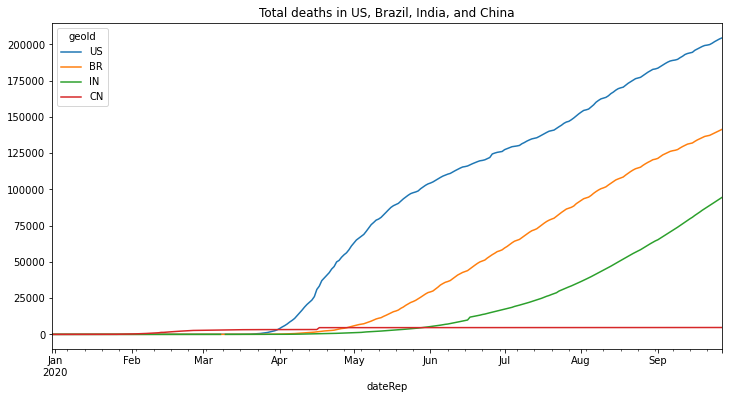

In [106]:
df_geo['deaths'][['US', 'BR', 'IN', 'CN']].cumsum().plot(
    figsize=(12,6),
    title='Total deaths in US, Brazil, India, and China')

Due to the large differences in numbers, a logarithmic scale can be used to more easily compare the trends. This can be achieved by using the log10 function NumPy. Note that there are warnings as some cases are zero.

<ipython-input-104-aeda3d571873>:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(df_geo['cases'][['UK', 'FR', 'ES', 'DE', 'EL']].cumsum()).plot(


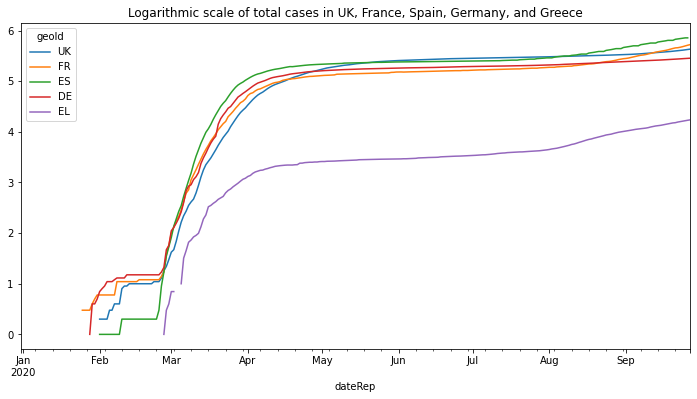

In [104]:
np.log10(df_geo['cases'][['UK', 'FR', 'ES', 'DE', 'EL']].cumsum()).plot(
    figsize=(12,6),
    title='Logarithmic scale of total cases in UK, France, Spain, Germany, and Greece')

This shows that measures that China implemented were successful in flattening the curve. However, this is not the cases for the other countries as deaths are still increasing logarithmically.

In [ ]:
np.log10(df_geo['cases'][['US', 'BR', 'IN', 'CN']].cumsum()).plot()

#### Relative growth in total number of cases per day
This measure is often used. It is calcualted by dividing the number of cases of the current day by the previous day. This can be achieved by dividing the dataframe by the same dataframe shifted by one row. We will onyl show data from March 16, which is when this dataset began collecting data.

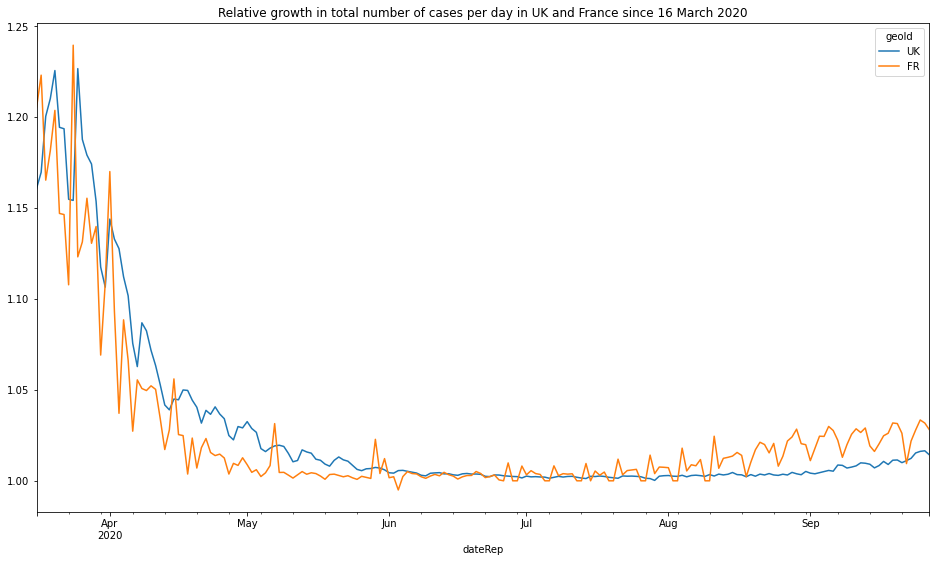

In [103]:
(df_geo.cumsum() / df_geo.shift(1).cumsum())['cases'][['UK', 'FR']].loc['20200316':].plot(#
    figsize=(16,9),
    title='Relative growth in total number of cases per day in UK and France since 16 March 2020')

From this measure (relative increase in cases since yesterday) we can calculate the number of days to double the total amount of cases by a logarithmic measure. The greater the number of days for cases to double the better.

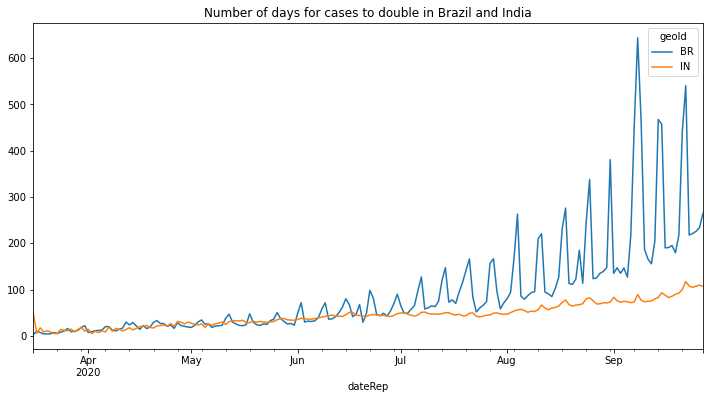

In [99]:
(np.log(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))['cases'][['BR', 'IN']].loc['20200316':].plot(
    figsize=(12,6),
    title='Number of days for cases to double in Brazil and India')

Rolling window functions can be used to smooth the sawtooth nature of the data.

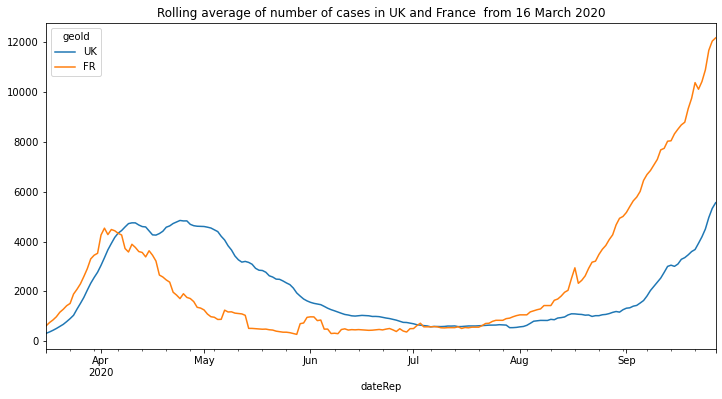

In [100]:
df_geo['cases'][['UK', 'FR']].rolling(7).mean().loc['20200316':].plot(
    figsize=(12,6),
    title='Rolling average of number of cases in UK and France  from 16 March 2020')

The default window function is a rectangle (boxcar), where all values have equal weighting. We can use a different window function that can weigh the values in the window different, e.g. the triangle function which gives greater bias to more recent values in the window.

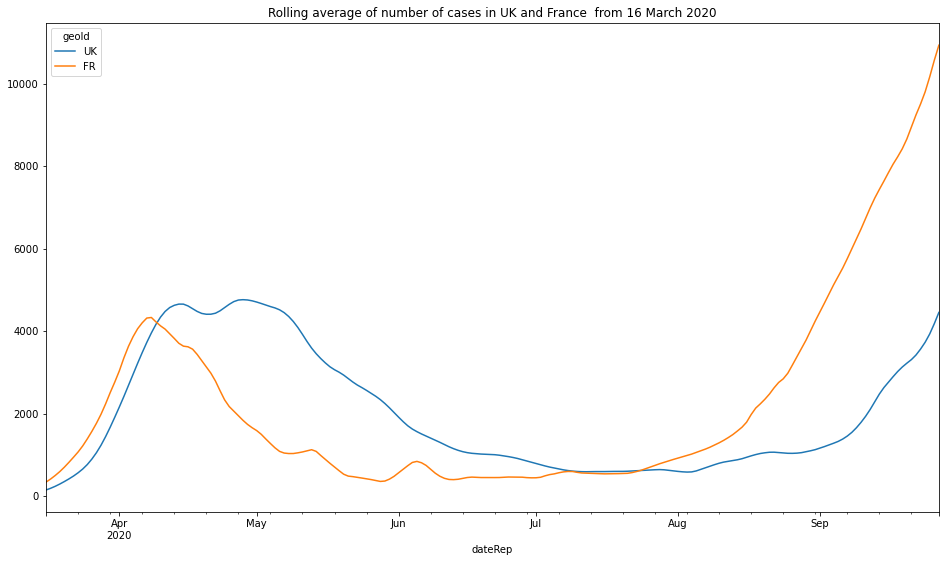

In [96]:
df_geo['cases'][['UK', 'FR']].rolling(14, win_type='triang').mean().loc['20200316':].plot(
    figsize=(16,9),
    title='Rolling average of number of cases in UK and France  from 16 March 2020')

We can see that this function when applied to China makes the spike of 15,000 additional cases more evenly distributed.

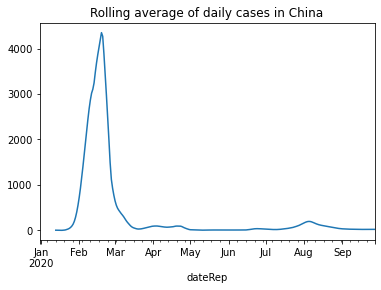

In [95]:
df_geo['cases']['CN'].rolling(14, win_type='triang').mean().plot(
    title='Rolling average of daily cases in China') 

#### Number of active cases (infected category in the Susceptible, Infectious, or Recovered (SIR) model)
This is the curve that is most important to flatten, to prevent healthcare systems from being overwhelmed. 

We assume that an infection lasts 14 days on average (which is to be reviewed, EU CDC uses 14 days but other studies suggest 18 days), so we will only look at new cases from the last 14 days. By ignoring older infections (the recovered category in SIR) this shows the current number of active infections.

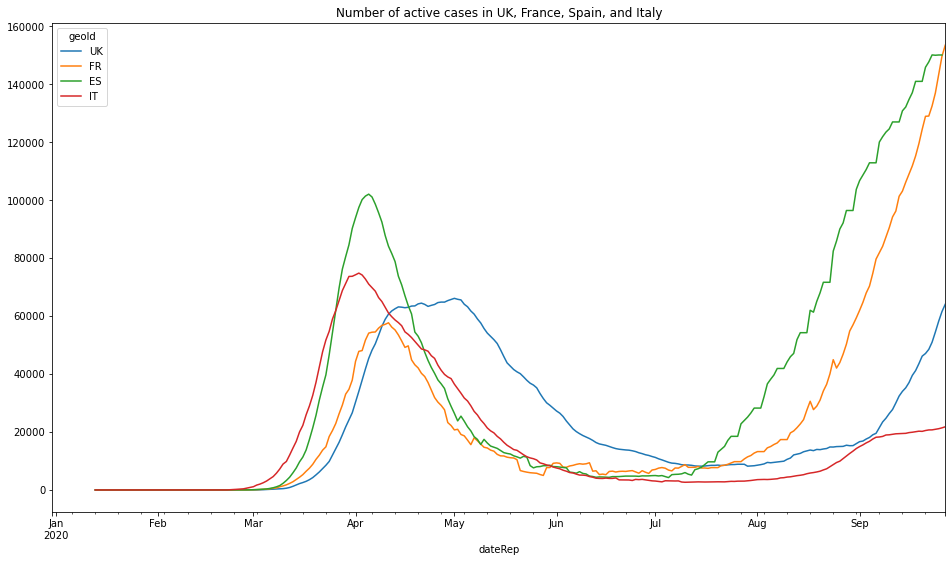

In [93]:
df_geo['cases'][['UK', 'FR', 'ES', 'IT']].rolling(14).sum().plot(
    figsize=(16,9),
    title='Number of active cases in UK, France, Spain, and Italy')

If we assume that 8% of currently infected are in Intensive Care, we can estimate the necessary capacity in hospitals with the following figure:

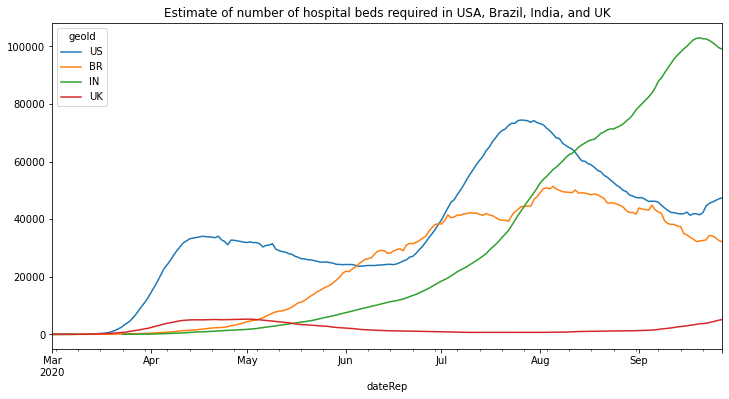

In [101]:
(df_geo['cases'][['US', 'BR', 'IN', 'UK']].rolling(14).sum().loc['20200301':] * 0.08).plot(
    figsize=(12,6),
    title='Estimate of number of hospital beds required in USA, Brazil, India, and UK') 

For the UK this corresponds with the official NHS Hospital Activity statistics. The drop in patients is most likely due to an increase in testing, so the percentage needs to be lowered.

In [64]:
(df_geo['cases'][['UK', 'FR']].rolling(14).sum() * 0.01).tail(10)

geoId,UK,FR
dateRep,,
2020-09-18,412.03,1153.00
2020-09-19,435.85,1195.40
2020-09-20,461.94,1244.88
2020-09-21,471.05,1289.86
2020-09-22,485.25,1290.81
2020-09-23,509.91,1325.45
2020-09-24,545.10,1370.40
2020-09-25,582.25,1432.93
2020-09-26,615.59,1496.84


#### R-value

The infection rate can be calculated numerous ways. One method is to take the average number of cases for last week and dividing it by the number of infectious cases the week before. A rolling window will be used for smoothing the data.

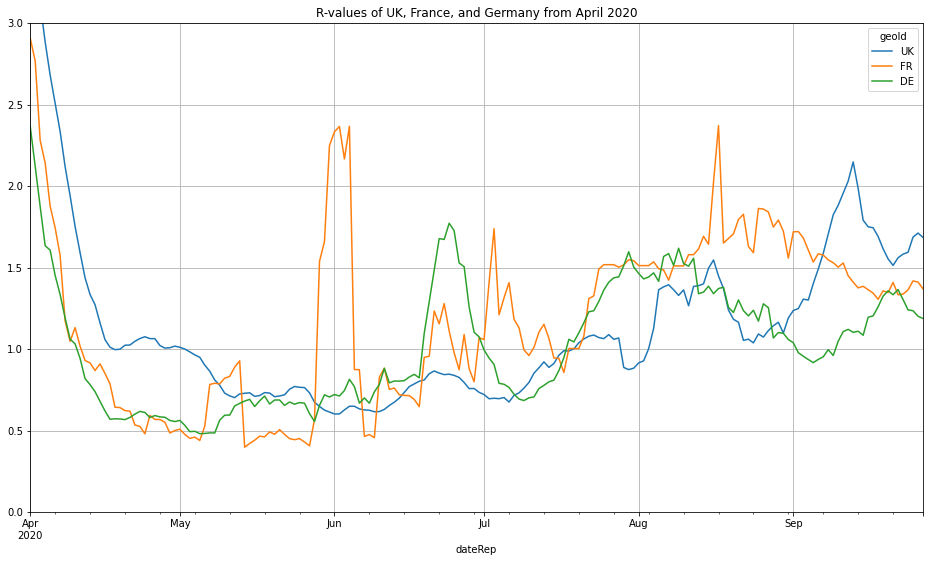

In [91]:
countries = ['UK', 'FR', 'DE']

(df_geo.rolling(7).mean() / df_geo.shift(7).rolling(14).mean())['cases'][countries].loc['20200401':].plot(
    figsize=(16,9), 
    grid=True, 
    ylim=(0,3), 
    title='R-values of UK, France, and Germany from April 2020')

Let's examine what happens when we include the number of deaths in the week before as part of the number of active cases in the week before that. This is an estimate of the death rate for known cases, which is dependent on testing and recording methodologies and therefore this measure is not comparable across different countries or even within a single country over time.

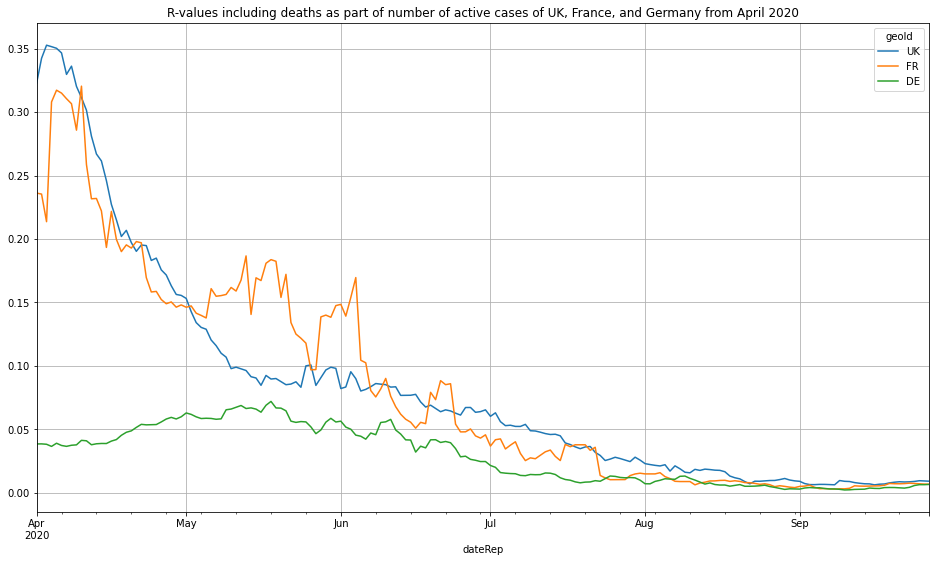

In [92]:
(df_geo.rolling(7).mean()['deaths'] / df_geo.shift(7).rolling(14).mean()['cases'])[countries].loc['20200401':].plot(
    figsize=(16,9), 
    grid=True, 
    title='R-values including deaths as part of number of active cases of UK, France, and Germany from April 2020')

A recent paper by Daddi and Giavalisco, the double log of the cumulative cases divided by the daily increase should approach linearity. The middle part of the outbreak looks promising when ignoring the noise of the cases at the beginning.

<ipython-input-87-368c99226201>:1: RuntimeWarning: invalid value encountered in log
  np.log(np.log(df_geo.cumsum() / df_geo))['cases'][countries].loc['20200301':].rolling(7).mean().plot(
<ipython-input-87-368c99226201>:1: RuntimeWarning: divide by zero encountered in log
  np.log(np.log(df_geo.cumsum() / df_geo))['cases'][countries].loc['20200301':].rolling(7).mean().plot(


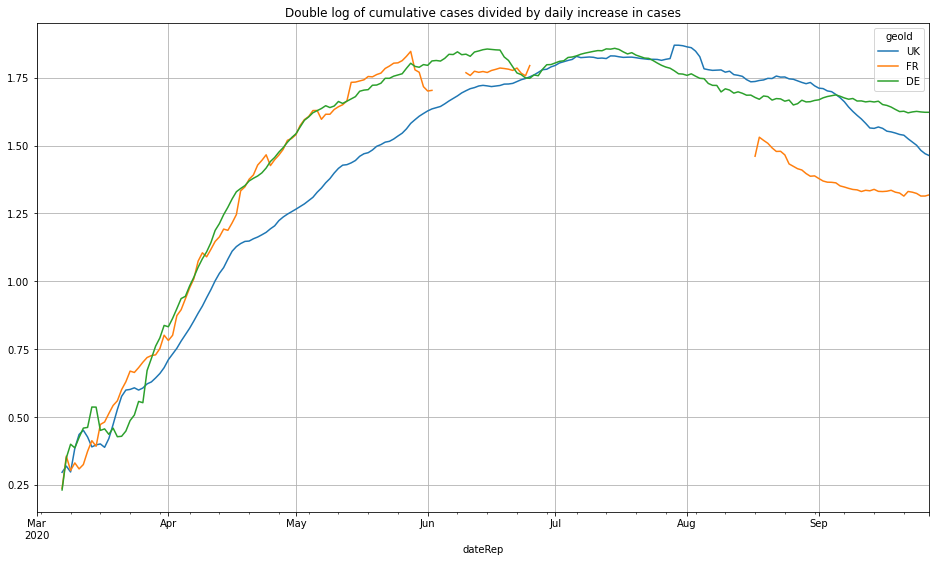

In [87]:
np.log(np.log(df_geo.cumsum() / df_geo))['cases'][countries].loc['20200301':].rolling(7).mean().plot(
    figsize=(16,9), grid=True, title='Double log of cumulative cases divided by daily increase in cases')